# An analysis of monthly snowfall data from the Denver/Boulder National Weather Service. Source: https://www.weather.gov/bou/SeasonalSnowfall

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('denver_snowfall.csv', delim_whitespace=True)

In [3]:
months = df.columns[1:13]

In [4]:
months

Index(['July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'April',
       'May', 'June'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 16 columns):
Year                            136 non-null object
July                            136 non-null float64
Aug                             136 non-null float64
Sep                             136 non-null object
Oct                             136 non-null object
Nov                             136 non-null object
Dec                             136 non-null object
Jan                             136 non-null object
Feb                             136 non-null object
Mar                             136 non-null object
April                           136 non-null object
May                             136 non-null object
June                            136 non-null object
Total                           136 non-null float64
Departure_Historical_Average    136 non-null float64
Departure_30_Year_Average       136 non-null float64
dtypes: float64(5), object(11)
memory usage: 17.1+ KB


## Some months use 'T' to indicate a trace amount of snow. In order to simplify this analysis, let's convert all columns to numeric values. Any 'T' values will be converted to NaN

In [6]:
for m in months:
    df[m] = pd.to_numeric(df[m], errors='coerce')

## Let's order the months by the highest average snowfall

In [7]:
df[months].mean().sort_values(ascending=False)

Mar      11.532090
April     9.435156
Dec       8.326316
Nov       7.802326
Feb       7.697037
Jan       6.695522
Oct       4.537705
May       2.280198
Sep       1.165254
June      0.005263
Aug       0.000000
July      0.000000
dtype: float64

## Has the order changed for the most recent 30 years?

In [8]:
df[months][0:30].mean().sort_values(ascending=False)

Mar      10.232143
Dec       8.113793
Jan       7.486207
April     7.400000
Nov       7.148276
Feb       7.075862
Oct       4.585185
May       1.236000
Sep       0.844828
June      0.000000
Aug       0.000000
July      0.000000
dtype: float64

## Now for each season, find the snowiest month

In [9]:
snowiest_months = df[months].idxmax(axis=1)

## What percentage of snow seasons have March as the snowiest month?

In [10]:
snowiest_months.value_counts()/df.Year.count()

Mar      0.352941
April    0.176471
Dec      0.125000
Feb      0.117647
Jan      0.073529
Nov      0.066176
Oct      0.051471
May      0.022059
Sep      0.014706
dtype: float64

## Which months most frequently have only a trace amount of snow?

In [11]:
df[months].isna().sum().sort_values(ascending=False)

May      35
Sep      18
Oct      14
April     8
Nov       7
June      3
Dec       3
Mar       2
Jan       2
Feb       1
Aug       0
July      0
dtype: int64

## Which months have the highest variance in snowfall amount?

In [12]:
df[months].std().sort_values(ascending=False)

Mar      7.672964
April    7.457804
Dec      7.211059
Nov      6.839996
Oct      5.450503
Feb      5.152176
Jan      4.873634
May      3.717527
Sep      3.078749
June     0.043198
Aug      0.000000
July     0.000000
dtype: float64

## For a slightly different perspective, let's order the months by the difference in max and min snowfall

In [13]:
(df[months].max() - df[months].min()).sort_values(ascending=False)

Dec      57.3
Nov      42.6
Mar      34.9
April    33.8
Oct      31.2
Jan      24.2
Feb      22.1
Sep      17.2
May      15.5
June      0.4
Aug       0.0
July      0.0
dtype: float64

## Let's find the percentage of seasons for which each month had at least a trace amount of snow

In [14]:
((df[months] > 0) | (df[months].isna())).sum()/df.Year.count()

July     0.000000
Aug      0.000000
Sep      0.338235
Oct      0.860294
Nov      0.992647
Dec      1.000000
Jan      1.000000
Feb      1.000000
Mar      1.000000
April    0.970588
May      0.647059
June     0.036765
dtype: float64

## To get a sense of range, we'll look at min, max, and median snowfall for all months

In [15]:
df[months].min()

July     0.0
Aug      0.0
Sep      0.0
Oct      0.0
Nov      0.0
Dec      0.1
Jan      0.1
Feb      0.3
Mar      0.3
April    0.0
May      0.0
June     0.0
dtype: float64

In [16]:
df[months].max()

July      0.0
Aug       0.0
Sep      17.2
Oct      31.2
Nov      42.6
Dec      57.4
Jan      24.3
Feb      22.4
Mar      35.2
April    33.8
May      15.5
June      0.4
dtype: float64

In [17]:
df[months].median()

July      0.00
Aug       0.00
Sep       0.00
Oct       2.65
Nov       5.60
Dec       6.90
Jan       5.80
Feb       7.00
Mar      10.00
April     8.55
May       0.20
June      0.00
dtype: float64

## Since July and August have never experienced measurable snowfall in this dataset, and June rarely has, let's define the months with somewhat regular snowfall for the rest of this analysis

In [18]:
snow_months = [x for x in months if df[x].mean() > 1]

In [19]:
seasons_sorted = 12 - np.argsort(np.argsort(df[snow_months].fillna(0.0001), axis=1))

## How often are each of the snow months in the top 3 snowiest months for the season?

In [20]:
((seasons_sorted == 1) | (seasons_sorted == 2) | (seasons_sorted == 3)).sum()/136

Sep      0.0
Oct      0.0
Nov      0.0
Dec      0.0
Jan      0.0
Feb      0.0
Mar      0.0
April    0.0
May      0.0
dtype: float64

## Now we'll look at the number of times each snow month was the snowiest, 2nd snowiest, and 3rd snowiest

In [21]:
(seasons_sorted == 1).sum()

Sep      0
Oct      0
Nov      0
Dec      0
Jan      0
Feb      0
Mar      0
April    0
May      0
dtype: int64

In [22]:
(seasons_sorted == 2).sum()

Sep      0
Oct      0
Nov      0
Dec      0
Jan      0
Feb      0
Mar      0
April    0
May      0
dtype: int64

In [23]:
(seasons_sorted == 3).sum()

Sep      0
Oct      0
Nov      0
Dec      0
Jan      0
Feb      0
Mar      0
April    0
May      0
dtype: int64

## March seems to be the most interesting snow month. Let's take a closer look

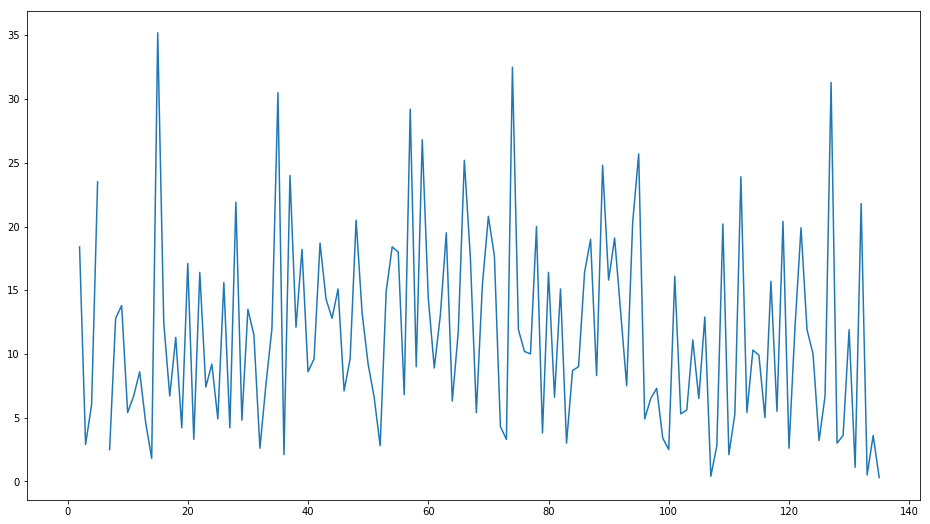

In [24]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

df.Mar.plot(figsize=(16, 9))

## It turns out that the March snowfall is highly positively correlated with the season total snowfall. Interestingly, April snowfall is slightly negatively correlated with March snowfall

In [25]:
df.Mar.corr(df.Total)

0.46077920984153004

In [26]:
df.Mar.corr(df.April)

-0.1404860999076884

In [27]:
df.Mar.corr(df.Feb)

0.041064294241886456

In [28]:
deciles = [x/10 for x in range(1, 10)]

In [29]:
df.Feb.describe()

count    135.000000
mean       7.697037
std        5.152176
min        0.300000
25%        3.500000
50%        7.000000
75%       10.650000
max       22.400000
Name: Feb, dtype: float64

In [30]:
df.Mar.describe()

count    134.000000
mean      11.532090
std        7.672964
min        0.300000
25%        5.325000
50%       10.000000
75%       16.400000
max       35.200000
Name: Mar, dtype: float64

In [31]:
df.April.describe()

count    128.000000
mean       9.435156
std        7.457804
min        0.000000
25%        3.475000
50%        8.550000
75%       13.550000
max       33.800000
Name: April, dtype: float64

## In years when the March snowfall is in the lowest 25% the median April snowfall is 20% higher!

In [32]:
df.loc[df.Mar < 5.325].April.describe(percentiles=deciles)

count    30.00000
mean     11.72000
std       8.42371
min       0.80000
10%       1.95000
20%       3.66000
30%       6.31000
40%       8.58000
50%      10.30000
60%      11.44000
70%      14.60000
80%      19.54000
90%      23.47000
max      32.00000
Name: April, dtype: float64

## Let's look at empirical CDFs for all the snow months

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x123362f98>,
      dtype=object)

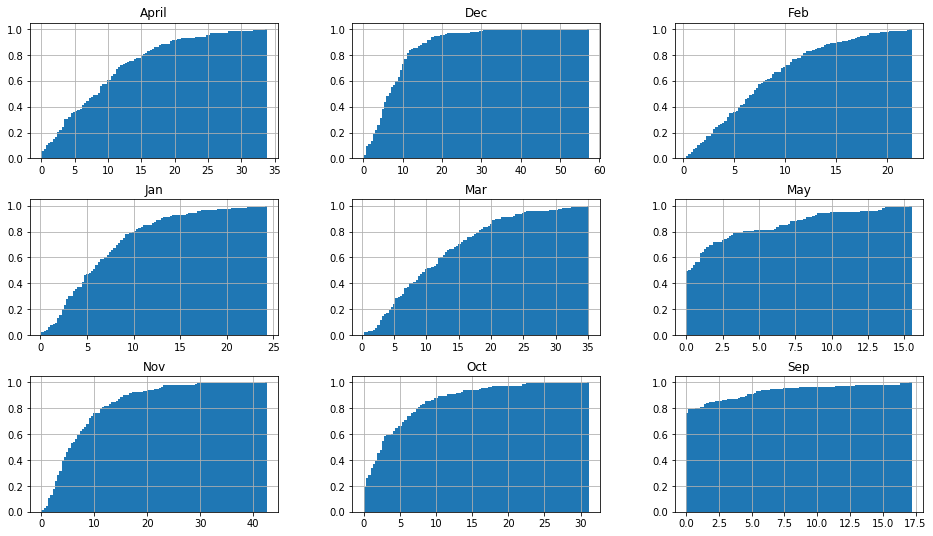

In [33]:
df[snow_months].hist(cumulative=True, density=1, bins=100, figsize=(16, 9))

In [34]:
for s in snow_months:
    print(f"{s} snowfall correlation to season total: {df[s].corr(df.Total)}")

Sep snowfall correlation to season total: 0.21566614763671837
Oct snowfall correlation to season total: 0.3558379933305486
Nov snowfall correlation to season total: 0.5127458351851215
Dec snowfall correlation to season total: 0.3289685205024159
Jan snowfall correlation to season total: 0.19876129024641023
Feb snowfall correlation to season total: 0.3346142558965818
Mar snowfall correlation to season total: 0.46077920984153004
April snowfall correlation to season total: 0.39389603531426715
May snowfall correlation to season total: 0.21324068811654057
